### Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
%matplotlib inline

In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


#pip install xlrd

### Reading in files

In [4]:
smile_on = pd.read_csv('../data/SmileOn11.28.2020.csv', sep = ',', encoding='gbk', skiprows = 2, low_memory=False)
city_info = pd.read_csv("../data/500_Cities__Local_Data_for_Better_Health__2019_release.csv")
#data_dict = pd.read_excel('../data/Data_Dictionary.xlsx')

In [4]:
#apc = pd.read_excel('../data/2020_October_Web_Addendum_A.10212020.xlsx', skiprows = 1)
#hcpcs = pd.read_excel('../data/2020_October_Web_Addendum_B.10212020.xlsx', skiprows = 2)
#prov_out = pd.read_csv("../data/Provider_Outpatient_Hospital_Charge_Data_by_APC__CY2017.csv", low_memory= False)
#bill = pd.read_csv("../data/Medicare_Provider_Utilization_and_Payment_Data__Physician_and_Other_Supplier_PUF_CY2017.csv", low_memory=False)

### EDA on smile_on

In [5]:
so_1 = smile_on[['CallReportNum', 'ReportVersion',
'CallerNum', 'CityName','CountyName', 
'PostalCode','EnteredOn','Birth Year', 
'SMILE ON 60+ Screening - Last Screening Date',
'SMILE ON 60+ Oral Care Encounter - What care was provided to the enrollee? (Select all that apply)',
'SMILE ON 60+ Site Information - Enroller ID', 'SMILE ON 60+ Site Information - Enroller Location', 
'SMILE ON 60+ Treatment Plan - Is the treatment plan completed?', 'SMILE ON 60+ Treatment Plan - Was a treatment plan developed?',
'SMILE ON 60+ Treatment Plan - Was the enrollee able to be restored to function (can chew) and "social six" esthetics (top front six teeth are present and disease free)', 
'SMILE ON 60+ Verification of Eligibility - Transportation Arranged', 'SMILE ON 60+ Verification of Eligibility - Verification of Eligibility']]


Chaning column names

In [6]:
so_1.columns=['CallReportNum', 'ReportVersion', 'CallerNum', 'CityName', 'CountyName',
       'PostalCode','EnteredOn', 'BirthYear',
       'Screening - Last Screening Date',
       'Oral Care Encounter - What care was provided to the enrollee?',
       'Site Information - Enroller ID',
       'Site Information - Enroller Location',
       'Treatment Plan - Is the treatment plan completed?',
       'Treatment Plan - Was a treatment plan developed?',
       'Treatment Plan - Was the enrollee able to be restored to function',
       'Verification of Eligibility Transportation Arranged',
       'Verification of Eligibility']

In [7]:
so_1.head()

,CallReportNum,ReportVersion,CallerNum,CityName,CountyName,PostalCode,EnteredOn,BirthYear,Screening - Last Screening Date,Oral Care Encounter - What care was provided to the enrollee?,Site Information - Enroller ID,Site Information - Enroller Location,Treatment Plan - Is the treatment plan completed?,Treatment Plan - Was a treatment plan developed?,Treatment Plan - Was the enrollee able to be restored to function,Verification of Eligibility Transportation Arranged,Verification of Eligibility
0,81381827,SMILE ON 60+ Registration,3859874,Springfield,Robertson,37172.0,11/25/2020 16:48,1957,NaN,NaN,Matthew Walker Comprehensive Health Center Inc...,Provider Site,NaN,NaN,NaN,NaN,NaN
1,81379177,SMILE ON 60+ Registration,3859755,Nashville,Davidson,37212.0,11/25/2020 15:55,1943,NaN,NaN,NaN,Health Assist Office,NaN,NaN,NaN,NaN,NaN
2,81377435,SMILE ON 60+ Clinical,2518680,Rogersville,Hawkins,37857.0,11/25/2020 15:02,1957,NaN,5650 - Add tooth to existing partial denture - 30,Friends in Need Health Center - Kingsport,Provider Site,Yes,Yes,Yes,NaN,NaN
3,81375215,SMILE ON 60+ Clinical,3231923,Memphis,Shelby,38104.0,11/25/2020 14:17,1953,NaN,No Code - Denture step Mandibular: may be used...,Christ Community Health Services- Frayser,Provider Site,NaN,NaN,NaN,NaN,NaN
4,81373934,SMILE ON 60+ Clinical,-1,NaN,NaN,NaN,11/25/2020 13:58,1953,11/25/2020,NaN,Neighborhood Health - Lebanon,NaN,NaN,Yes,No,NaN,Yes


In [8]:
so_1 = so_1[(so_1['CallerNum'] != -1) & (so_1['CallerNum'] != -2)]

In [9]:
treatment_plan= so_1[so_1['Treatment Plan - Is the treatment plan completed?']=='Yes']

In [10]:
treatment_plan = treatment_plan.sort_values(by = 'EnteredOn')

In [11]:
treatment_plan_patients = treatment_plan.drop_duplicates(['CallerNum'], keep='last')

In [12]:
treatment_plan_patients.shape

(2987, 17)

In [13]:
treatment_plan_patients['Site Information - Enroller ID'].value_counts()

Church Health Center - Memphis                                                          385
Interfaith Dental Clinic - Nashville                                                    370
Interfaith Dental Clinic - Murfreesboro                                                 251
Healing Hands Health Center - Bristol                                                   224
Interfaith Health Clinic of Knoxville - Knoxville                                       216
Keystone Dental Care Inc. - Johnson City                                                194
Friends in Need Health Center - Kingsport                                               193
Matthew Walker Comprehensive Health Center Inc. - Nashville                             189
Karis Dental Clinic - Cleveland                                                         180
Christ Community Health Services- Hickory Hill                                          101
Appalachian Miles for Smiles - Mobile                                           

In [14]:
treatment_plan_restored= treatment_plan_patients[treatment_plan_patients['Treatment Plan - Was the enrollee able to be restored to function']=='Yes']
treatment_plan_restored.shape


(2653, 17)

In [15]:
treatment_plan_patients['Treatment Plan - Was the enrollee able to be restored to function'].value_counts()

Yes    2653
No       86
Name: Treatment Plan - Was the enrollee able to be restored to function, dtype: int64

In [16]:
patients_restored= so_1[so_1['Treatment Plan - Was the enrollee able to be restored to function'].isin(['Yes','No'])]

In [77]:
patients_restored.head(2)

,CallReportNum,ReportVersion,CallerNum,CityName,CountyName,PostalCode,EnteredOn,BirthYear,Screening - Last Screening Date,Oral Care Encounter - What care was provided to the enrollee?,Site Information - Enroller ID,Site Information - Enroller Location,Treatment Plan - Is the treatment plan completed?,Treatment Plan - Was a treatment plan developed?,Treatment Plan - Was the enrollee able to be restored to function,Verification of Eligibility Transportation Arranged,Verification of Eligibility
35116,59364969,SMILE ON 60+ Clinical,2511788,Lewisburg,Marshall,37091.0,1/10/2019 12:45,1937,1/8/2019,NaN,Interfaith Dental Clinic - Murfreesboro,Provider Site,Yes,Yes,Yes,No,Yes
35186,59355822,SMILE ON 60+ Clinical,2440677,Cleveland,Bradley,37323.0,1/10/2019 7:39,1951,NaN,No Code - Denture step Mandibular: may be used...,Karis Dental Clinic - Cleveland,Provider Site,Yes,NaN,Yes,NaN,NaN


In [17]:
patients_restored = patients_restored.sort_values(by = 'EnteredOn')

In [18]:
patients_restored = patients_restored.drop_duplicates(['CallerNum'], keep='last')
patients_restored.shape

(4575, 17)

In [78]:
patients_restored.head(2)

,CallReportNum,ReportVersion,CallerNum,CityName,CountyName,PostalCode,EnteredOn,BirthYear,Screening - Last Screening Date,Oral Care Encounter - What care was provided to the enrollee?,Site Information - Enroller ID,Site Information - Enroller Location,Treatment Plan - Is the treatment plan completed?,Treatment Plan - Was a treatment plan developed?,Treatment Plan - Was the enrollee able to be restored to function,Verification of Eligibility Transportation Arranged,Verification of Eligibility
35116,59364969,SMILE ON 60+ Clinical,2511788,Lewisburg,Marshall,37091.0,1/10/2019 12:45,1937,1/8/2019,NaN,Interfaith Dental Clinic - Murfreesboro,Provider Site,Yes,Yes,Yes,No,Yes
35186,59355822,SMILE ON 60+ Clinical,2440677,Cleveland,Bradley,37323.0,1/10/2019 7:39,1951,NaN,No Code - Denture step Mandibular: may be used...,Karis Dental Clinic - Cleveland,Provider Site,Yes,NaN,Yes,NaN,NaN


In [19]:
patients_restored_yes = patients_restored[patients_restored["Treatment Plan - Was the enrollee able to be restored to function"]=='Yes']
patients_restored_no = patients_restored[patients_restored["Treatment Plan - Was the enrollee able to be restored to function"]=='No']

In [20]:
yes = patients_restored_yes['Site Information - Enroller ID'].value_counts().to_frame().reset_index()

In [21]:
no = patients_restored_no['Site Information - Enroller ID'].value_counts().to_frame().reset_index()

In [22]:
combo = pd.merge(yes, no, on = 'index')

In [23]:
combo['total'] = combo['Site Information - Enroller ID_x'] + combo['Site Information - Enroller ID_y']

In [24]:
combo['percentage'] = (combo['Site Information - Enroller ID_x']/combo['total'])*100

In [25]:
combo.head(2)

,index,Site Information - Enroller ID_x,Site Information - Enroller ID_y,total,percentage
0,Church Health Center - Memphis,348,169,517,67.311412
1,Interfaith Dental Clinic - Nashville,346,276,622,55.627010


In [26]:
combo.columns=['location','restored_yes','restored_no','total','percentage']

### New DF with success of restoration to function

In [28]:
combo_5 = combo.head()

In [29]:
combo_5

,location,restored_yes,restored_no,total,percentage
0,Church Health Center - Memphis,348,169,517,67.311412
1,Interfaith Dental Clinic - Nashville,346,276,622,55.627010
2,Interfaith Dental Clinic - Murfreesboro,233,195,428,54.439252
3,Healing Hands Health Center - Bristol,188,54,242,77.685950
4,Friends in Need Health Center - Kingsport,171,36,207,82.608696


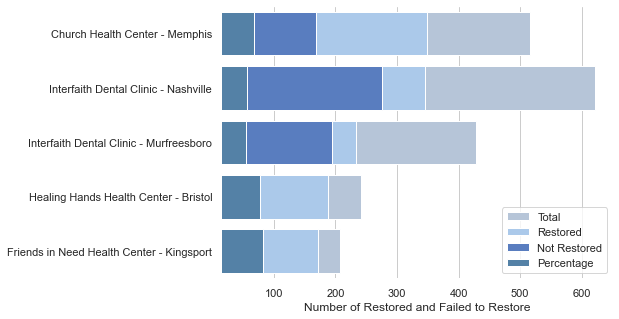

In [150]:
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(7, 5))

# Plot total
sns.set_color_codes("pastel")
sns.barplot(x="total", y="location", data=combo_5,
            label="Total", color="lightsteelblue")

# Plot the restored cases
sns.set_color_codes("pastel")
sns.barplot(x="restored_yes", y="location", data=combo_5,
            label="Restored", color="b")

# Plot the failed to restored cases
sns.set_color_codes("muted")
sns.barplot(x="restored_no", y="location", data=combo_5,
            label="Not Restored", color="b")

# Plot Percentage
sns.set_color_codes("muted")
sns.barplot(x="percentage", y="location", data=combo_5,
            label="Percentage", color="steelblue")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(xlim=(15, 650), ylabel="",
       xlabel="Number of Restored and Failed to Restore")
sns.despine(left=True, bottom=True)

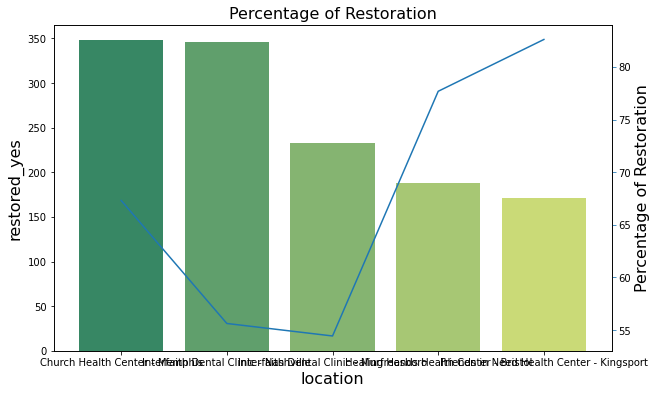

In [64]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(10,6))
color = 'tab:green'
#bar plot creation
ax1.set_title('Percentage of Restoration', fontsize=16)
ax1.set_xlabel('location', fontsize=16)
ax1.set_ylabel('restoration_yes', fontsize=16)
ax1 = sns.barplot(x='location', y='restored_yes', data = combo_5, palette='summer')
ax1.tick_params()
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'
#line plot creation
ax2.set_ylabel('Percentage of Restoration', fontsize=16)
ax2 = sns.lineplot(x='location', y='percentage', data = combo_5, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
#show plot
plt.show()


<AxesSubplot:>

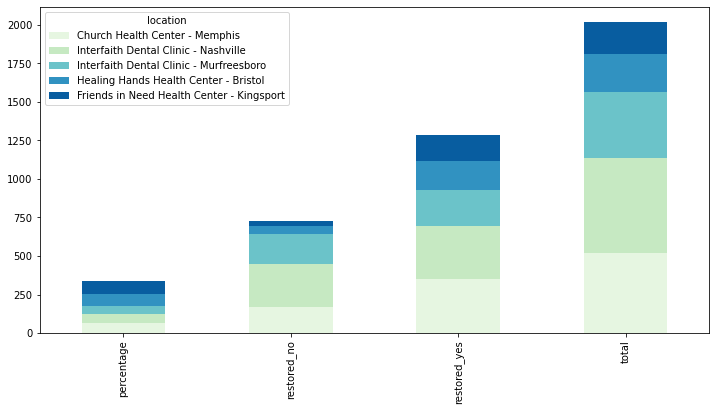

In [76]:
from matplotlib.colors import ListedColormap

combo_5.set_index('location')\
  .reindex(combo_5.set_index('location').sum().sort_values().index, axis=1)\
  .T.plot(kind='bar', stacked=True,
          colormap=ListedColormap(sns.color_palette("GnBu", 10)), 
          figsize=(12,6))

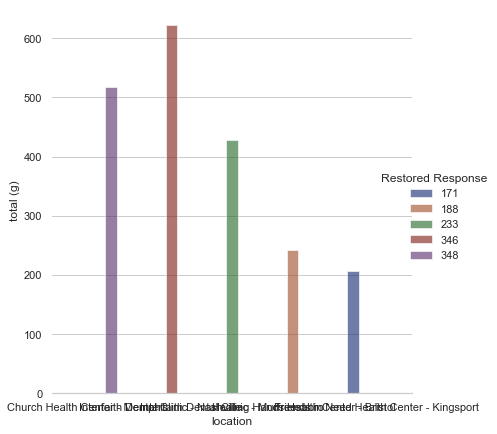

In [87]:
sns.set_theme(style="whitegrid")

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=combo_5, kind="bar",
    x="location", y="total", hue="restored_yes",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("location", "total (g)")
g.legend.set_title("Restored Response")

In [52]:
patients_restored['Treatment Plan - Was the enrollee able to be restored to function'].value_counts()

Yes    2489
No     2086
Name: Treatment Plan - Was the enrollee able to be restored to function, dtype: int64

In [28]:
(2489/(2489+2086))*100

54.404371584699454

### End of group code

In [ ]:
#so_1['PostalCode']=np.int64(so_1['PostalCode'])

In [ ]:
#so_1[['DateEntered','Time']] = so_1.EnteredOn.str.split(" ", expand=True)


In [ ]:
#pd.to_datetime(so_1['EnteredOn'])

### EDA on city_info

In [ ]:
#city_info.head(2)

In [ ]:
#city_info=city_info[city_info["StateAbbr"].isin(["TN"])]
#city_info.head()

In [ ]:
#city_info['Measure'].value_counts()

In [ ]:
#city_info.isnull().sum()

### Data for Smile_on Locations

In [ ]:
#location_number,Facility ,Address,Zip ,City ,full_address 
#1,Matthew Walker Comprehensive Health Center Inc. - Nashville,1035 14th Ave N,37208,Nashville,"1035 14th Ave N, Nashville, TN 37208"
#2,Friends in Need Health Center - Kingsport,1105 W Stone Dr # 5,37660,Kingsport,"1105 W Stone Dr # 5, Kingsport, TN 37660"
#3,Christ Community Health Services- Frayser,969 Frayser Blvd,38127,Memphis,"969 Frayser Blvd, Memphis, TN 38127"
#4,Neighborhood Health - Lebanon,217 E High St #200,37087,Lebanon,"217 E High St #200, Lebanon, TN 37087"
#5,Christ Community Health Services- Raleigh,3481 Austin Peay Hwy,38128,Memphis,"3481 Austin Peay Hwy, Memphis, TN 38128"
#6,Karis Dental Clinic - Cleveland,254 Broad St SW,37311,Cleveland,"254 Broad St SW, Cleveland, TN 37311"
#7,Interfaith Health Clinic of Knoxville - Knoxville,315 Gill Ave,37917,Knoxville,"315 Gill Ave, Knoxville, TN 37917"
#8,TDH - Maury Co,1909 Hampshire Pike,38401,Columbia,"1909 Hampshire Pike, Columbia, TN 38401"
#9,Knox County CAC/Office on Aging - Knoxville,2247 Western Ave,37921,Knoxville,"2247 Western Ave, Knoxville, TN 37921"
#10,Christ Community Health Services- Broad Avenue,"2861 Broad Ave, Memphis",38112,Memphis,"2861 Broad Ave, Memphis, TN 38112"
#11,TDH - Lawrence Co,1065 East Broad Street,39654,Monticello,"1065 East Broad Street
#Monticello, MS 39654"
#12,Church Health Center - Memphis,1350 Concourse Ave Suite 142,38104,Memphis,"1350 Concourse Ave Suite 142, Memphis, TN 38104"
#13,Northeast Tennessee Community Health Centers Inc. - Johnson City,2151 Century Ln,37604,Johnson City,"2151 Century Ln, Johnson City, TN 37604"
#14,Christ Community Health Services- Hickory Hill,5366 Mendenhall Mall,38115,Memphis,"5366 Mendenhall Mall, Memphis, TN 38115"
#15,Matthew Walker - Clarksville,230 Dover Rd,37042,Clarksville,"230 Dover Rd, Clarksville, TN 37042"
#16,Healing Hands Health Center - Bristol,245 Midway Medical Park,37620,Bristol,"245 Midway Medical Park, Bristol, TN 37620"
#17,Interfaith Dental Clinic - Murfreesboro,210 Robert Rose Dr,37129,Murfreesboro,"210 Robert Rose Dr, Murfreesboro, TN 37129"
#18,Interfaith Dental Clinic - Nashville,600 Hill Ave,37210,Nashville,"600 Hill Ave, Nashville, TN 37210"
#19,Neighborhood Health - Napier/Nashville,107 Charles E Davis Blvd,37210,Nashville,"107 Charles E Davis Blvd, Nashville, TN 37210"
#20,Fifty Forward - Nashville,108 Donelson Pike,37214,Nashville,"108 Donelson Pike, Nashville, TN 37214"
#21,Mountain Hope Good Shepherd Clinic,312 Prince St,37862,Sevierville,"312 Prince St, Sevierville, TN 37862"
#22,Neighborhood Health - Cleveland Park/ Nashville,905 Main St,37206,Nashville,"905 Main St, Nashville, TN 37206"
#23,Christ Community Health Services- Third Street,3362 S 3rd St,38109,Memphis,"3362 S 3rd St, Memphis, TN 38109"
#24,Keystone Dental Care Inc. - Johnson City,603 Bert St # 12,37601,Johnson City,"603 Bert St # 12, Johnson City, TN 37601"
#25,Smiles Inc. - South Pittsburg - serving Marion Grundy Franklin and Hamilton Counties,"107 E 10th St, South",37380,Pittsburg,"107 E 10th St, South Pittsburg, TN 37380"
#26,Trinity health ministries,1127 E Lamar Alexander Pkwy,37804,Maryville,"1127 E Lamar Alexander Pkwy
#Maryville, TN 37804"
#27,Reelfoot Ministries - Obion,6923 Minnick Elbridge Rd,38240,Obion,"6923 Minnick Elbridge Rd, Obion, TN 38240"
#28,Neighborhood Health - Mission/Nashville,639 Lafayette St,37203,Nashville,"639 Lafayette St, Nashville, TN 37203"
#29,Neighborhood Health - Eastside/Nashville,905 Main St,37206,Nashville,"905 Main St, Nashville, TN 37206"
#30,Appalachian Miles for Smiles - Mobile,1105 W Stone Dr,37660,Kingsport,"1105 W Stone Dr, Kingsport, TN 37660"
#31,Meharry Mobile Dental Clinic,1818 Albion St,37208,Nashville,"1818 Albion St, Nashville, TN 37208"
#Collapse